In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# sns.set()
# sns.set_context('notebook')
sns.set_style('white')

from sklearn.utils import shuffle

In [2]:
se_df = pd.read_csv('Stanford_politeness_corpus/stack-exchange.annotated.csv')
wk_df = pd.read_csv('Stanford_politeness_corpus/wikipedia.annotated.csv')

In [6]:
len(se_df)

6603

In [7]:
len(wk_df)

4353

In [21]:
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, 'Politeness distributions')

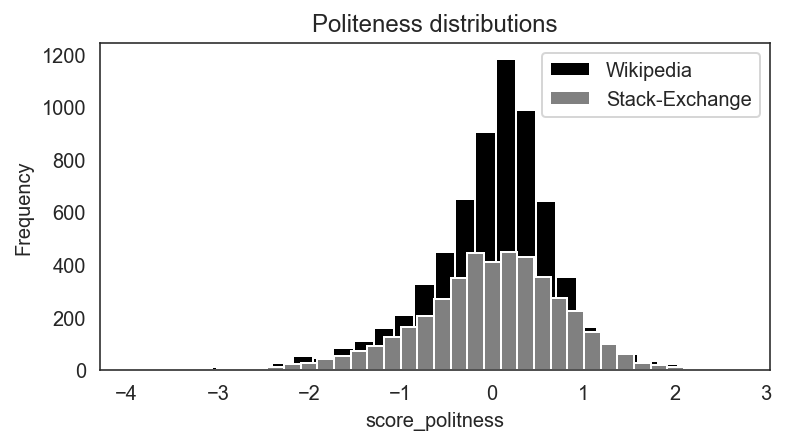

In [28]:
ax = se_df['Normalized Score'].plot(kind='hist', bins=30, color='k')
wk_df['Normalized Score'].plot(ax=ax, kind='hist', bins=30, figsize=(6,3), color='grey')
ax.legend(['Wikipedia', 'Stack-Exchange'])
plt.xlabel('score_politness')
plt.title('Politeness distributions')

In [8]:
# Under 25% percentil (Q1): impolite
# 25% ~ 75% percentil: neutral
# Above 75% percentil: polite

labels = {'0':'impolite', '1':'neutral', '2':'polite'}
bin_labels = {'0':'impolite', '1':'polite'}

In [9]:
def get_bin_labels(df):
    request_lst = df['Request'].tolist()
    score_lst = df['Normalized Score'].tolist()
    score_25 = np.percentile(score_lst, 25) # score at 25th percentile
    score_75 = np.percentile(score_lst, 75) # score at 75th percentile
    combined = [('"'+request.replace('"', '')+'"', (score > score_75) * 1, score)
                for (request, score) in zip(request_lst, score_lst)
                if (score < score_25 or score > score_75)]
    [requests, politeness, scores] = list(zip(*combined))
    new_df = pd.DataFrame(list(zip(requests, politeness)), columns=['Request', 'Politeness'])
    new_df['Request'] = new_df['Request'].apply(lambda x: x.replace('\"\"', ''))
    new_df['Request'] = new_df['Request'].apply(lambda x: x.replace('  ', ' '))
    return new_df

In [5]:
# def get_label(score, score_25, score_75):
#     if score > score_75:
#         return 2
#     if score < score_25:
#         return 0
#     else:
#         return 1

In [6]:
# def get_labels(df):
#     request_lst = df['Request'].tolist()
#     score_lst = df['Normalized Score'].tolist()
#     score_25 = np.percentile(score_lst, 25) # score at 25th percentile
#     score_75 = np.percentile(score_lst, 75) # score at 75th percentile
#     combined = [('"'+request.replace('"', '')+'"', get_label(score, score_25, score_75), score)
#                 for (request, score) in zip(request_lst, score_lst)]
#     [requests, politeness, scores] = list(zip(*combined))
#     new_df = pd.DataFrame(list(zip(requests, politeness)), columns=['Request', 'Politeness'])
#     new_df['Request'] = new_df['Request'].apply(lambda x: x.replace('\"\"', ''))
#     new_df['Request'] = new_df['Request'].apply(lambda x: x.replace('  ', ' '))
#     return new_df

In [9]:
# # Prepare 3-way datasets
# wk_politeness = get_labels(wk_df)
# se_politeness = get_labels(se_df)
# politeness_df = pd.concat([wk_politeness, se_politeness]) 

# wk_politeness.to_csv('data/3-way/dataset_wk_politeness.csv', index=False)
# se_politeness.to_csv('data/3-way/dataset_se_politeness.csv', index=False)
# politeness_df.to_csv('data/3-way/dataset_politeness.csv', index=False)

# # Shuffle the combined dataset
# shuffle(politeness_df, random_state=100).to_csv('data/3-way/dataset_politeness_shuffled.csv', index=False)

In [10]:
# Prepare 2-way datasets
wk_bin_politeness = get_bin_labels(wk_df)
se_bin_politeness = get_bin_labels(se_df)
# bin_politeness_df = pd.concat([wk_bin_politeness, se_bin_politeness])
# bin_politeness_df = shuffle(bin_politeness_df, random_state=100) # Shuffle the combined dataset


# bin_politeness_df.to_csv('dataset_bin_politeness.csv', index=False)

# # Shuffle the combined dataset
# shuffle(bin_politeness_df, random_state=100).to_csv('data/3-way/dataset_bin_politeness_shuffled.csv', index=False)

In [16]:
len(wk_bin_politeness.loc[wk_bin_politeness['Politeness']==1])

1088

In [17]:
len(wk_bin_politeness.loc[wk_bin_politeness['Politeness']==0])

1088

In [11]:
len(wk_bin_politeness)

2176

In [12]:
len(se_bin_politeness)

3302

In [ ]:
wk_bin_politeness.to_csv('dataset_wk_bin_politeness.csv', index=False)
se_bin_politeness.to_csv('dataset_se_bin_politeness.csv', index=False)